In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

df = pdr.get_data_yahoo("GOOGL", start="2009-01-01", end="2023-01-01")
df.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-23,87.110001,89.550003,87.070000,89.230003,89.230003,23003000
2022-12-27,88.800003,88.940002,87.010002,87.389999,87.389999,20097300
2022-12-28,86.980003,88.040001,85.940002,86.019997,86.019997,19523200
2022-12-29,86.620003,88.849998,86.610001,88.449997,88.449997,23333500
2022-12-30,86.980003,88.300003,86.570000,88.230003,88.230003,23986300


In [3]:
df = df.reset_index()
df = df.drop(['Date', 'Adj Close'], axis=1)
df.head()

,Open,High,Low,Close,Volume
0,7.722723,8.053554,7.645145,8.041041,144275580
1,8.033033,8.289289,7.882883,8.209459,195364440
2,8.332833,8.528529,8.167918,8.359860,256750992
3,8.216216,8.281031,7.976727,8.058308,179600220
4,7.964965,8.137888,7.941441,8.137888,143883972


In [4]:
df.shape

(3524, 5)

In [5]:
# Moving Average for 100
ma100 = df.Close.rolling(100).mean()

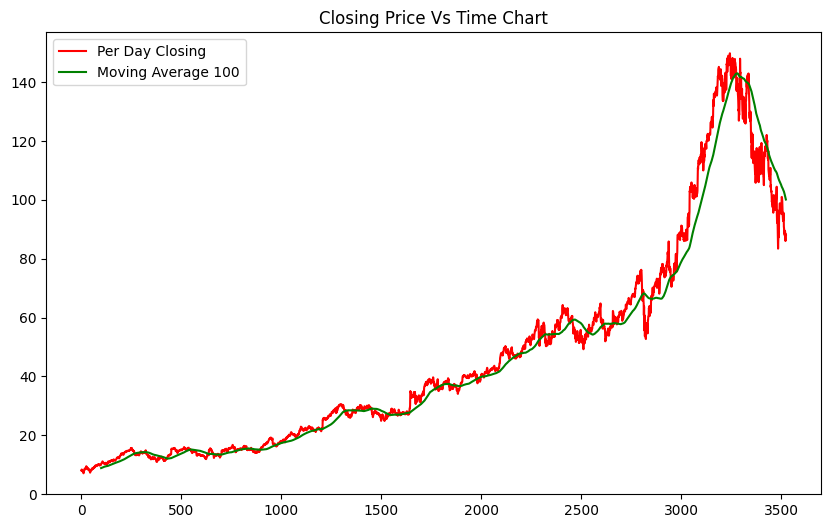

In [6]:
plt.figure(figsize = (10, 6))
plt.title("Closing Price Vs Time Chart")
plt.plot(df.Close, 'r', label="Per Day Closing")
plt.plot(ma100, 'g', label="Moving Average 100")
plt.legend()

In [7]:
# Moving Average for 200
ma200 = df.Close.rolling(200).mean()

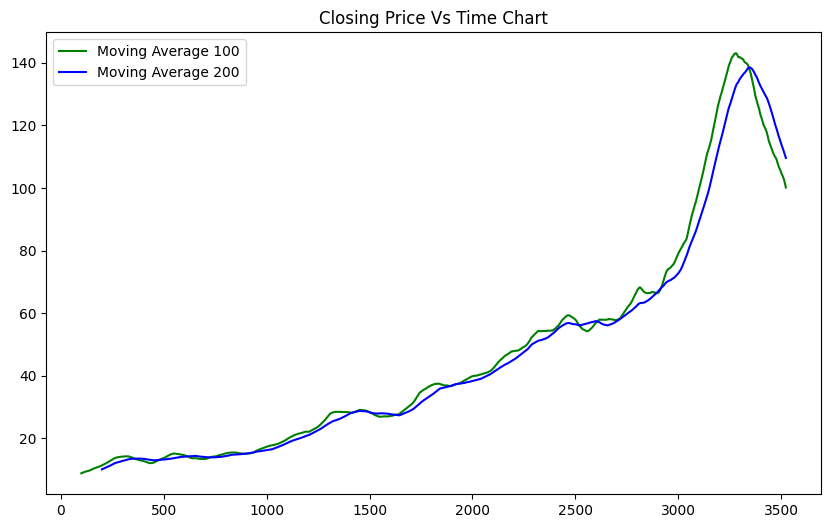

In [8]:
plt.figure(figsize = (10, 6))
plt.title("Closing Price Vs Time Chart")
plt.plot(ma100, 'g', label="Moving Average 100")
plt.plot(ma200, 'b', label="Moving Average 200")
plt.legend()

In [9]:
train_df = pd.DataFrame(df['Close'][0: int(len(df)*0.80)])
test_df = pd.DataFrame(df['Close'][int(len(df)*0.80):int(len(df))])
print(train_df.shape)
print(test_df.shape)

(2819, 1)
(705, 1)


In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [11]:
train_df_arr = scaler.fit_transform(train_df)
train_df_arr

array([[0.01395472],
       [0.01638964],
       [0.01856408],
       ...,
       [0.7012188 ],
       [0.77547317],
       [0.67335177]])

In [12]:
x_train = []
y_train = []
for i in range(100, train_df_arr.shape[0]):
    x_train.append(train_df_arr[i-100: i])    
    y_train.append(train_df_arr[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape, y_train.shape

((2719, 100, 1), (2719,))

In [13]:
# 1. Dropout is a regularization technique where randomly selected neurons are ignored during training. 
# In order to prevent Neural Network from overfitting
# 2. LSTM, which stands for long short-term memory network, is a special kind of RNN that can perform 
# learning from long-term dependencies, which is a problem when using simple RNN.
# 3. A recurrent neural network (RNN) is a type of artificial neural network which uses sequential data or time series data.
# 4. A dense layer is a fully connected layer used in the neural network's end stages 
# to change the output's dimensionality from the preceding layer.
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [14]:
model = Sequential()

model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [16]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
85/85 [==============================] - 38s 358ms/step - loss: 0.0280
Epoch 2/50
85/85 [==============================] - 29s 337ms/step - loss: 0.0063
Epoch 3/50
85/85 [==============================] - 24s 280ms/step - loss: 0.0054
Epoch 4/50
85/85 [==============================] - 25s 296ms/step - loss: 0.0047
Epoch 5/50
85/85 [==============================] - 24s 280ms/step - loss: 0.0048
Epoch 6/50
85/85 [==============================] - 25s 289ms/step - loss: 0.0046
Epoch 7/50
85/85 [==============================] - 24s 277ms/step - loss: 0.0043
Epoch 8/50
85/85 [==============================] - 25s 289ms/step - loss: 0.0038
Epoch 9/50
85/85 [==============================] - 26s 306ms/step - loss: 0.0039
Epoch 10/50
85/85 [==============================] - 25s 298ms/step - loss: 0.0035
Epoch 11/50
85/85 [==============================] - 28s 330ms/step - loss: 0.0038
Epoch 12/50
85/85 [==============================] - 27s 321ms/step - loss: 0.0031
Epoch 13/50
8

In [17]:
model.save('keras_model.h5')

c:\users\abhis\appdata\local\programs\python\python39\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [18]:
past_100_days = train_df.tail(100)

In [19]:
final_df = past_100_days._append(test_df, ignore_index=True)
final_df.head()

,Close
0,62.060001
1,62.881500
2,62.955502
3,63.215000
4,64.448997


In [20]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.0962968 ],
       [0.10475435],
       [0.10551621],
       [0.10818782],
       [0.12089215],
       [0.10631409],
       [0.10633467],
       [0.1053566 ],
       [0.11228018],
       [0.12121647],
       [0.12215848],
       [0.12193714],
       [0.13013733],
       [0.13119771],
       [0.12567949],
       [0.12512864],
       [0.12459845],
       [0.13127492],
       [0.14383006],
       [0.13677774],
       [0.13304576],
       [0.12752235],
       [0.12663698],
       [0.12330644],
       [0.12946811],
       [0.13325681],
       [0.13280894],
       [0.12867024],
       [0.12083041],
       [0.12385721],
       [0.13631448],
       [0.14044289],
       [0.14684138],
       [0.14869453],
       [0.14864308],
       [0.14934317],
       [0.15152574],
       [0.15069181],
       [0.15781105],
       [0.15482023],
       [0.15328621],
       [0.1556181 ],
       [0.15293102],
       [0.15262736],
       [0.14943577],
       [0.15872211],
       [0.15469157],
       [0.147

In [21]:
input_data.shape

(805, 1)

In [22]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])    
    y_test.append(input_data[i, 0])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test.shape, y_test.shape

((705, 100, 1), (705,))

In [23]:
y_pred = model.predict(x_test)
y_pred.shape

23/23 [==============================] - 3s 92ms/step


(705, 1)

In [24]:
y_pred

array([[0.20892885],
       [0.20381534],
       [0.19832495],
       [0.19252743],
       [0.18648729],
       [0.1802694 ],
       [0.17398365],
       [0.16773276],
       [0.16166197],
       [0.15586059],
       [0.15041474],
       [0.14540052],
       [0.14081767],
       [0.13664939],
       [0.13285464],
       [0.12947652],
       [0.12655985],
       [0.1241553 ],
       [0.12228873],
       [0.12095743],
       [0.12020017],
       [0.12003632],
       [0.12044679],
       [0.12141342],
       [0.12288359],
       [0.12473351],
       [0.1268617 ],
       [0.12919743],
       [0.13167334],
       [0.13422287],
       [0.13675848],
       [0.13929883],
       [0.1418967 ],
       [0.14456269],
       [0.14729184],
       [0.15008956],
       [0.15293989],
       [0.15581177],
       [0.15871069],
       [0.16164972],
       [0.16461436],
       [0.16755861],
       [0.17043602],
       [0.17321569],
       [0.17588294],
       [0.17841896],
       [0.18082933],
       [0.183

In [25]:
y_test

array([0.03290881, 0.01907714, 0.02961948, 0.00724785, 0.        ,
       0.03906023, 0.02444612, 0.0560011 , 0.02889367, 0.04745086,
       0.05550178, 0.02469319, 0.03237862, 0.0198544 , 0.06643536,
       0.06611104, 0.07869186, 0.07847051, 0.08044722, 0.10866656,
       0.10458449, 0.10465137, 0.11575485, 0.1065663 , 0.08134807,
       0.10515588, 0.11172422, 0.11451943, 0.11156466, 0.09186468,
       0.1482776 , 0.15060431, 0.13548055, 0.13835292, 0.15179854,
       0.14995057, 0.16222765, 0.16998005, 0.17988918, 0.16526481,
       0.15144335, 0.15583434, 0.16417348, 0.17041245, 0.16486328,
       0.18275645, 0.18151588, 0.18485671, 0.18904167, 0.18848061,
       0.18743052, 0.19529611, 0.19599101, 0.19982087, 0.19824569,
       0.18540229, 0.19864204, 0.20277045, 0.20485005, 0.21134641,
       0.17901927, 0.18469199, 0.18871743, 0.20196228, 0.20508687,
       0.19560495, 0.19072501, 0.2041191 , 0.21097575, 0.194874  ,
       0.19919799, 0.15875816, 0.17658441, 0.18733265, 0.19966

In [26]:
scale = scaler.scale_
scale_factor = 1/scale
y_pred = y_pred*scale_factor
y_test = y_test*scale_factor

In [27]:
y_pred

array([[20.29367737],
       [19.7969917 ],
       [19.2636989 ],
       [18.70057416],
       [18.11388318],
       [17.50992786],
       [16.89937973],
       [16.29221847],
       [15.70255024],
       [15.13905062],
       [14.61008404],
       [14.12304371],
       [13.67790211],
       [13.27302807],
       [12.90443694],
       [12.57631309],
       [12.29301169],
       [12.05945239],
       [11.87814928],
       [11.74883749],
       [11.67528311],
       [11.65936772],
       [11.69923724],
       [11.79312876],
       [11.93592867],
       [12.11561506],
       [12.32233126],
       [12.54920512],
       [12.78969447],
       [13.03733533],
       [13.28362433],
       [13.53037361],
       [13.78270976],
       [14.04166334],
       [14.30675091],
       [14.57849933],
       [14.85535699],
       [15.13430901],
       [15.41588658],
       [15.70136049],
       [15.98932245],
       [16.27530294],
       [16.55479194],
       [16.82478613],
       [17.08386129],
       [17

In [28]:
y_test

array([ 3.19649887,  1.85300064,  2.8769989 ,  0.70399857,  0.        ,
        3.79399872,  2.37450027,  5.4394989 ,  2.80649948,  4.60899734,
        5.39099884,  2.39849854,  3.14500046,  1.92849731,  6.45299911,
        6.42149734,  7.64349747,  7.62199783,  7.81399918, 10.55500031,
       10.15850067, 10.1649971 , 11.24349976, 10.35099792,  7.9015007 ,
       10.2140007 , 10.85199738, 11.12350082, 10.83649826,  8.92300034,
       14.40250015, 14.62849808, 13.15949631, 13.43849564, 14.74449539,
       14.56499863, 15.75749588, 16.51050186, 17.47299576, 16.05250168,
       14.70999527, 15.13650131, 15.94649887, 16.55250168, 16.01350021,
       17.75149918, 17.63100052, 17.95550156, 18.3619957 , 18.30749893,
       18.20550156, 18.9695015 , 19.03699875, 19.4090004 , 19.25600052,
       18.00849533, 19.29449844, 19.69549942, 19.89749527, 20.5284996 ,
       17.38850021, 17.93950272, 18.33050156, 19.61700058, 19.92049789,
       18.99950027, 18.52550125, 19.82649612, 20.49249649, 18.92

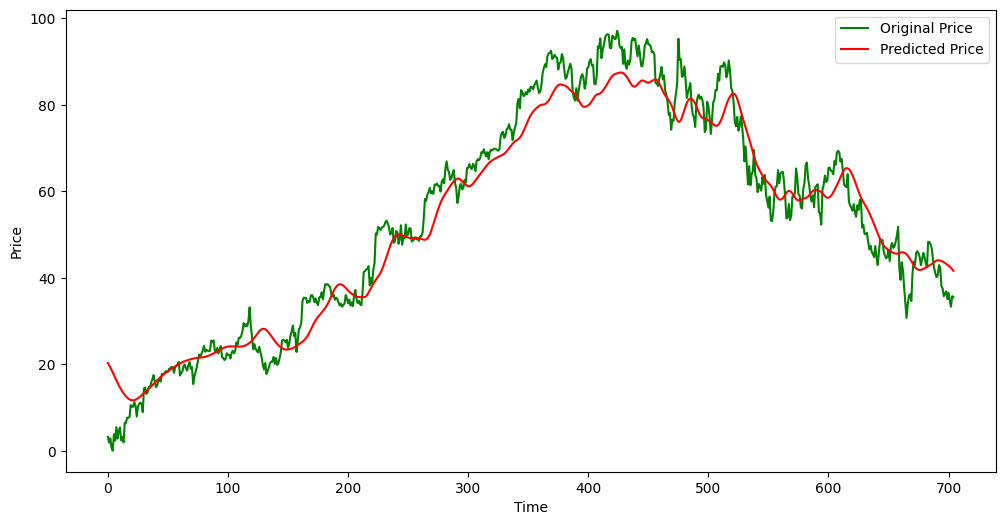

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'g', label="Original Price")
plt.plot(y_pred, 'r', label="Predicted Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()